In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
_N_STATES = 2   # angular position, angular velocity.
_N_ACTIONS = 2  # clockwise and counter-clockwise torques.
_N_STEPS = 53   # Number of discretization of each state.

_STATE_POS = 0  # Index for state angular position.
_STATE_POS_MIN = -np.pi * 0.5   # Lower bound of the angular position.
_STATE_POS_MAX = np.pi * 1.5    # Upper bound of the angular position.
_STATE_VEL = 1  # Index for state angular velocity.
_STATE_VEL_MIN = -np.pi * 5.0   # Lower bound of the angular velocity.
_STATE_VEL_MAX = np.pi * 5.0    # Upper bound of the angular velocity.

_STATE_POS_BIN = (_STATE_POS_MAX - _STATE_POS_MIN) / _N_STEPS # Bin width for discretizing angular position.
_STATE_VEL_BIN = (_STATE_VEL_MAX - _STATE_VEL_MIN) / _N_STEPS # Bin width for discretizing angular velocity.

In [8]:
def discretize_states(pos, vel):
    """
    Discretize the states such that the Q-table and calculation is tractable.
    """
    pos = np.mod(pos, _STATE_POS_MAX - _STATE_POS_BIN)
    pos_idx = np.floor((pos - _STATE_POS_MIN) / _STATE_POS_BIN)

    vel = np.clip(vel, _STATE_VEL_MIN, _STATE_VEL_MAX)
    vel_idx = np.floor((vel - _STATE_VEL_MIN) / _STATE_VEL_BIN)

    # Ensure that the indices are within the ranges of the number of steps.
    pos_idx = min(max(pos_idx, 0), _N_STEPS - 1)
    vel_idx = min(max(vel_idx, 0), _N_STEPS - 1)
    
    return pos_idx, vel_idx

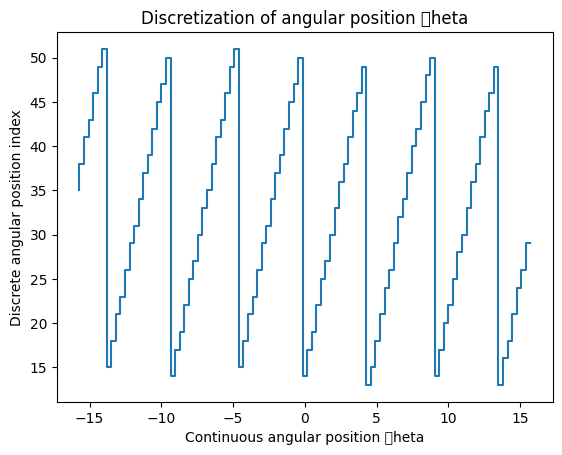

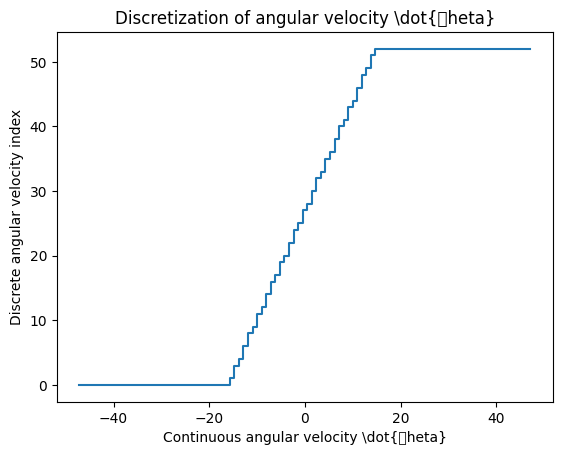

In [9]:
pos = np.linspace(-5*np.pi, 5*np.pi, 100)
vel = np.linspace(-15*np.pi, 15*np.pi, 100)

new_pos = list()
new_vel = list()
for p, v in zip(pos, vel):
    new_p, new_v = discretize_states(p, v)
    new_pos.append(new_p)
    new_vel.append(new_v)

new_pos = np.array(new_pos)
new_vel = np.array(new_vel)

plt.figure()
plt.step(pos, new_pos, label="Position")
plt.xlabel("Continuous angplotular position \theta")
plt.ylabel("Discrete angular position index")
plt.title("Discretization of angular position \theta")
plt.show()

plt.figure()
plt.step(vel, new_vel, label="Velocity")
plt.xlabel("Continuous angular velocity \dot{\theta}")
plt.ylabel("Discrete angular velocity index")
plt.title("Discretization of angular velocity \dot{\theta}")
plt.show()

In [6]:
new_pos

array([48., 51., 15., 18., 20., 23., 26., 28., 31., 34., 37., 39., 42.,
       45., 47., 50., 14., 17., 19., 22., 25., 27., 30., 33., 35., 38.,
       41., 43., 46., 49., 51., 15., 18., 21., 23., 26., 29., 31., 34.,
       37., 39., 42., 45., 47., 50., 14., 17., 19., 22., 25., 27., 30.,
       33., 35., 38., 41., 43., 46., 49., 51., 15., 18., 21., 23., 26.,
       29., 31., 34., 37., 39., 42., 45., 47., 50., 14., 17., 19., 22.,
       25., 27., 30., 33., 35., 38., 41., 44., 46., 49., 13., 15., 18.,
       21., 24., 26., 29., 32., 34., 37., 40., 42.])

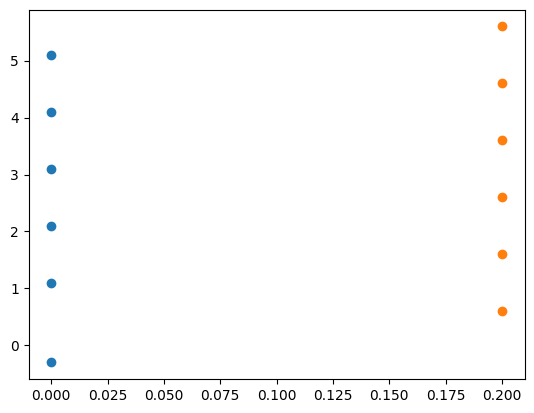

In [65]:
import matplotlib.pyplot as plt
import numpy as np

no_steps = 10
step_size = 0.5     # m
step_width = 0.2    # m
dx = 1.0            # m/s
dy = 1.0            # m/s
T = 10              # s

x_foot = [[-0.3],[0.6]]
y_foot = [[0.0],[step_width]]

t = np.linspace(0, T, no_steps)

for step in range(no_steps):
    last_foot_idx = int(~step % 2)
    curr_foto_idx = step % 2
    new_pos = x_foot[last_foot_idx][-1] + step_size
    x_foot[curr_foto_idx].append(new_pos)
    y_foot[curr_foto_idx].append(y_foot[curr_foto_idx][-1])

plt.scatter(y_foot[0],x_foot[0])
plt.scatter(y_foot[1],x_foot[1])
plt.show()

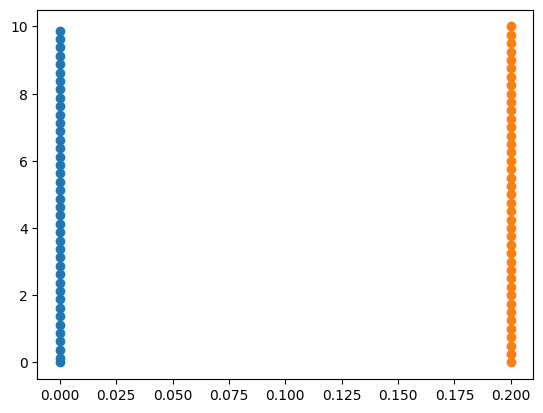

In [66]:
import matplotlib.pyplot as plt
import numpy as np

no_steps = 80
step_width = 0.2    # m
dx = 1.0            # m/s
dy = 1.0            # m/s
T = 10              # s

x_foot = [[0.0],[0.0]]
y_foot = [[0.0],[step_width]]

dt = T / no_steps

for step in range(no_steps):
    last_foot_idx = int(~step % 2)
    curr_foto_idx = step % 2
    new_pos = x_foot[last_foot_idx][-1] + dx * dt
    x_foot[curr_foto_idx].append(new_pos)
    y_foot[curr_foto_idx].append(y_foot[curr_foto_idx][-1])

plt.scatter(y_foot[0],x_foot[0])
plt.scatter(y_foot[1],x_foot[1])
plt.show()

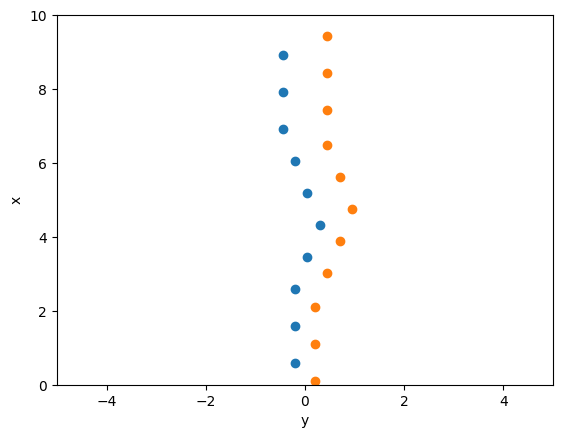

In [59]:
import matplotlib.pyplot as plt
import numpy as np

no_steps = 20
step_width = 0.4    # m
dx = 1.0            # m/s
dy = 1.0            # m/s
T = 10              # s

x_foot = [[-0.3],[0.1]]
y_foot = [[-step_width/2],[step_width/2]]

theta = np.zeros((no_steps))

theta[0:no_steps//4] = 0.0
theta[no_steps//4:no_steps//2] = np.pi/6
theta[no_steps//2:3*no_steps//4] = -np.pi/6
theta[3*no_steps//4:] = 0.0

dt = T / no_steps

for step in range(no_steps):
    last_foot_idx = int(~step % 2)
    curr_foot_idx = step % 2
    new_x = x_foot[last_foot_idx][-1] + dx * dt * np.cos(theta[step])
    new_y = y_foot[curr_foot_idx][-1] + step_size * np.sin(theta[step])
    x_foot[curr_foot_idx].append(new_x)
    y_foot[curr_foot_idx].append(new_y)

plt.scatter(y_foot[0],x_foot[0])
plt.scatter(y_foot[1],x_foot[1])
plt.xlabel('y')
plt.ylabel('x')
plt.xlim(-5,5)
plt.ylim(0,10)
plt.show()

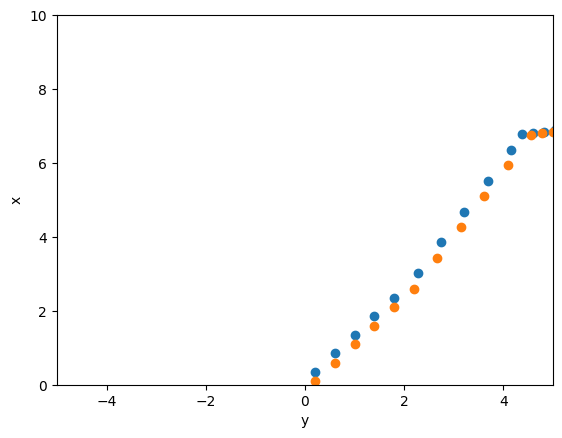

In [63]:
import matplotlib.pyplot as plt
import numpy as np

no_steps = 40
step_width = 0.4    # m
dx = 1.0            # m/s
dy = 1.0            # m/s
T = 10              # s

x_foot = [[-0.3],[0.1]]
y_foot = [[-step_width/2],[step_width/2]]

theta = np.zeros((no_steps))

theta[0:no_steps//4] = 0.0
theta[no_steps//4:no_steps//2] = np.pi/6
theta[no_steps//2:3*no_steps//4] = -np.pi/6
theta[3*no_steps//4:] = 0.0

# theta[0:no_steps//4] = 0.0
# theta[no_steps//4:no_steps//2] = np.pi/4
# theta[no_steps//2:3*no_steps//4:] = np.pi/2
# theta[3*no_steps//4:] = 3*np.pi/4

dt = T / no_steps

for step in range(no_steps):
    last_foot_idx = int(~step % 2)
    curr_foot_idx = step % 2
    new_x = x_foot[last_foot_idx][-1] + dx * dt * np.cos(theta[step]) + step_width * np.sin(theta[step])
    new_y = y_foot[curr_foot_idx][-1] + dx * dt * np.sin(theta[step]) + step_width * np.cos(theta[step])
    x_foot[curr_foot_idx].append(new_x)
    y_foot[curr_foot_idx].append(new_y)

plt.scatter(y_foot[0],x_foot[0])
plt.scatter(y_foot[1],x_foot[1])
plt.xlabel('y')
plt.ylabel('x')
plt.xlim(-5,5)
plt.ylim(0,10)
plt.show()